In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [4]:
df=pd.read_csv('bigmart.csv')

In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
#to check number of rows and columns
df.shape

(8523, 12)

In [ ]:
#to check duplicate rows
df[df.duplicated()]

There are no duplicate rows


In [13]:
#to check the data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 5 numerical features and 7 categorical features

In [14]:
#to check null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values in Item_Weight and Outlet_Size

<AxesSubplot:>

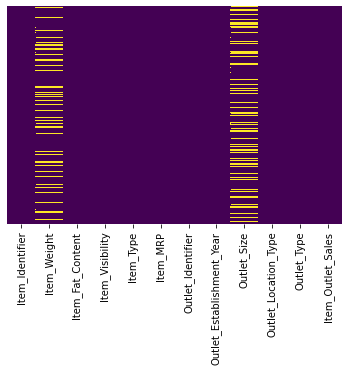

In [15]:
#null values by heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# DATA PREPROCESSING


In [16]:
#FILLING THE NULL VALUES
mean_item_weight=df.Item_Weight.mean()
mean_item_weight

12.857645184135976

In [17]:
df.Item_Weight=df.Item_Weight.fillna(mean_item_weight)

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are no null values left in Item_Weight

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

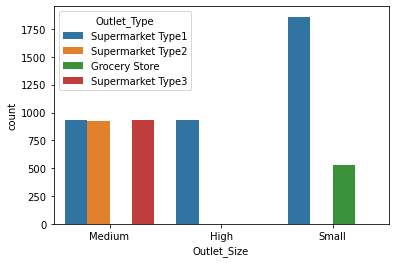

In [26]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=df)

In [27]:
#filling the null values of Outlet_Size
def fill_size(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=='Supermarket Type1'):
            row['Outlet_Size']='Small'
            return row
        elif(row['Outlet_Type']=='Supermarket Type2'):
            row['Outlet_Size']='Medium'
            return row
        elif(row['Outlet_Type']=='Supermarket Type3'):
            row['Outlet_Size']='Medium'
            return row
        else:
            row['Outlet_Size']='Small'
            return row
    else:
        return row
df=df.apply(fill_size,axis=1)

In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Our dataset is free from Null values

# DATA VISUALIZATION OF NUMERICAL FEATURES

<AxesSubplot:xlabel='Item_Weight'>

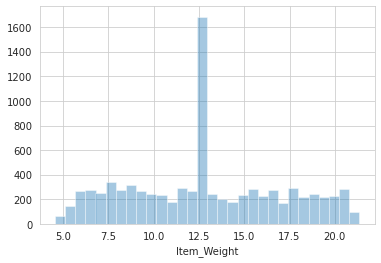

In [42]:
#Item_weight distribution
sns.set_style('whitegrid')
sns.distplot(df.Item_Weight,bins=30,kde=False)

<AxesSubplot:xlabel='Item_Visibility'>

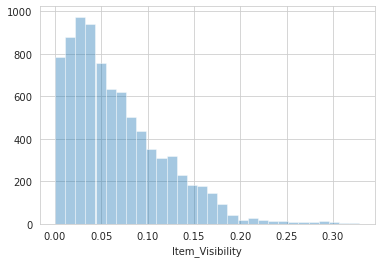

In [43]:
#Item_visibility_distribution
sns.set_style('whitegrid')
sns.distplot(df.Item_Visibility,bins=30,kde=False)

<AxesSubplot:xlabel='Item_MRP'>

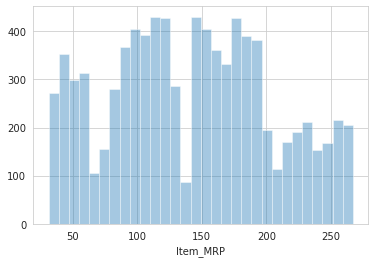

In [45]:
#Item_MRP distribution
sns.set_style('whitegrid')
sns.distplot(df.Item_MRP,bins=30,kde=False)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales'>

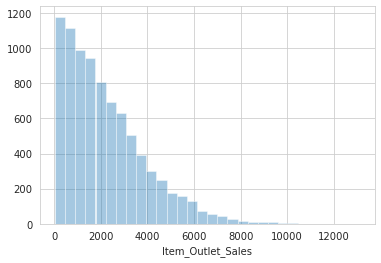

In [53]:
#Item_Outlet_Sales distribution
sns.set_style('whitegrid')
sns.distplot(df.Item_Outlet_Sales,bins=30,kde=False)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

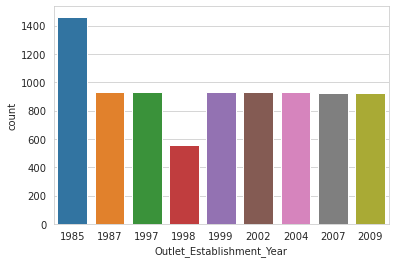

In [55]:
#Outlet_establishment_year
sns.set_style('whitegrid')
sns.countplot(x='Outlet_Establishment_Year',data=df)

# DATA VISUALIZATION OF CATEGORICAL FEATURES


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

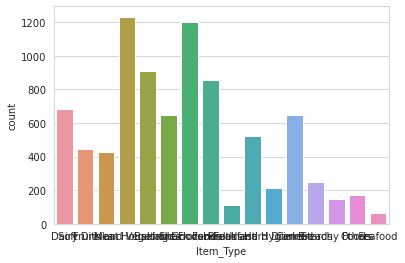

In [61]:
#Item_Type
sns.countplot(x='Item_Type',data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

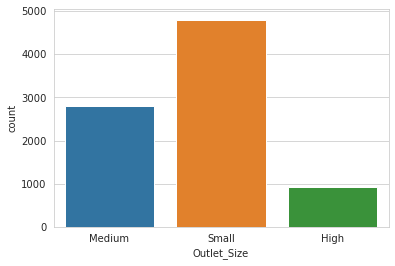

In [62]:
#Item_Outlet_Size
sns.countplot(x='Outlet_Size',data=df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

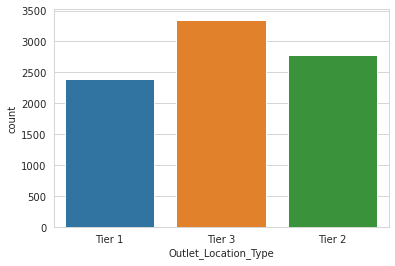

In [63]:
#Outlet_Location_type
sns.countplot(x='Outlet_Location_Type',data=df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

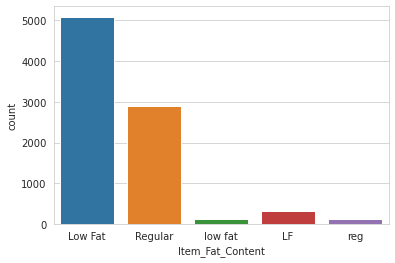

In [57]:
#ITEM FAT CONTENT
sns.countplot(x='Item_Fat_Content',data=df)

In [64]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [65]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# ONE HOT ENCODING 


In [66]:
import sklearn
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [67]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [69]:
df.drop('Item_Identifier',axis=1,inplace=True)
df.drop('Outlet_Identifier',axis=1,inplace=True)
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [70]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

# TRAIN TEST SPLIT

In [71]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df.Item_Outlet_Sales

In [72]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,0,1
1,5.920,1,0.019278,14,48.2692,1,2,2
2,17.500,0,0.016760,10,141.6180,1,0,1
3,19.200,1,0.000000,6,182.0950,2,2,0
4,8.930,0,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1
8519,8.380,1,0.046982,0,108.1570,2,1,1
8520,10.600,0,0.035186,8,85.1224,2,1,1
8521,7.210,1,0.145221,13,103.1332,1,2,2


In [73]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

# LINEAR REGRESSION

In [76]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [77]:
lr.pred=lr.predict(X_test)
lr.pred

array([4121.51185827, 1657.06941429, 2758.42722464, ..., 1252.8194429 ,
       -194.92080706, 2725.87733856])

In [83]:
lrs=lr.score(X_train,y_train)
lrs*100

50.220576890550674

# DECISION TREE

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20,min_samples_leaf=90)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=90)

In [80]:
dt_pred=dt.predict(X_test)
dt_pred

array([4322.3605451 , 1738.92367123, 3339.08336579, ...,  438.143006  ,
        128.17400902, 2949.23507778])

In [82]:
ds=dt.score(X_train,y_train)
ds*100

61.55192860078059